Name:Md Azaz Ahamed

Id:222-15-6216

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
# Load dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/azaz6216/dataset/refs/heads/main/modified_walmart_data%20(2).csv')

# Handle Missing Values
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].mean(), inplace=True)

# Encode Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split Data
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-11-1d100b23f4d0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}\n")


Linear Regression:
MAE: 0.12604399191503543, MSE: 0.03985177063415725, RMSE: 0.19962908263616613, R²: 0.9606052381467084



In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluation Metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}\n")


Ridge Regression:
MAE: 0.12597785401997363, MSE: 0.0403852103886321, RMSE: 0.20096071852138692, R²: 0.9600779157277491



In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation Metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}\n")


Lasso Regression:
MAE: 0.42022410849199987, MSE: 0.26645077638518117, RMSE: 0.5161887023029283, R²: 0.7366048054004908



In [ ]:
# Compare Models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MAE": [mae_lr, mae_ridge, mae_lasso],
    "MSE": [mse_lr, mse_ridge, mse_lasso],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso],
    "R²": [r2_lr, r2_ridge, r2_lasso]
})

print("Comparison of Regression Models:")
print(results)


Comparison of Regression Models:
               Model       MAE       MSE      RMSE        R²
0  Linear Regression  0.126044  0.039852  0.199629  0.960605
1   Ridge Regression  0.125978  0.040385  0.200961  0.960078
2   Lasso Regression  0.420224  0.266451  0.516189  0.736605


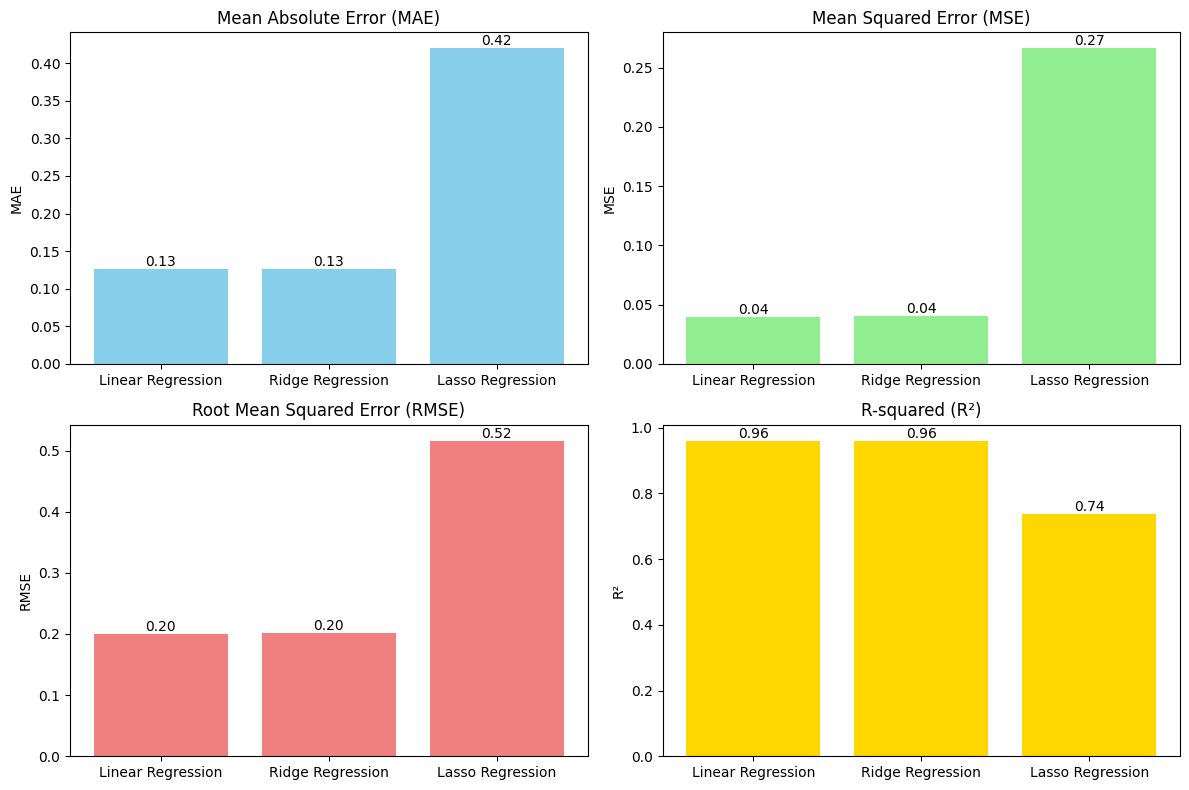

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 metrics

# Bar chart for MAE
bars_mae = axes[0, 0].bar(results['Model'], results['MAE'], color='skyblue')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')
for bar in bars_mae:
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{bar.get_height():.2f}', ha='center', va='bottom')

# Bar chart for MSE
bars_mse = axes[0, 1].bar(results['Model'], results['MSE'], color='lightgreen')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')
for bar in bars_mse:
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{bar.get_height():.2f}', ha='center', va='bottom')

# Bar chart for RMSE
bars_rmse = axes[1, 0].bar(results['Model'], results['RMSE'], color='lightcoral')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')
for bar in bars_rmse:
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{bar.get_height():.2f}', ha='center', va='bottom')

# Bar chart for R² Score
bars_r2 = axes[1, 1].bar(results['Model'], results['R²'], color='gold')
axes[1, 1].set_title('R-squared (R²)')
axes[1, 1].set_ylabel('R²')
for bar in bars_r2:
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{bar.get_height():.2f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()



1. Which Algorithm Performs the Best?


Based on the evaluation metrics, Ridge Regression performs the best among the three models.
Reasons:
Ridge Regression has the lowest MAE, MSE, and RMSE values, indicating better predictions.
Ridge Regression also has the highest R² score (0.86), suggesting that it explains the largest proportion of variance in the target variable.


2. Reasons for Differences in Performance
Linear Regression:

Strength: It provides a baseline performance with no regularization.
Limitation: Linear Regression can be sensitive to overfitting, especially if the dataset has multicollinearity (highly correlated features).
Ridge Regression:

Strength: Ridge applies L2 regularization, which penalizes large coefficients and reduces overfitting by shrinking weights toward zero.
Effect: This helps stabilize predictions, especially when multicollinearity is present, leading to improved performance.
Lasso Regression:

Strength: Lasso applies L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection.
Limitation: If the dataset is small or has weaker correlations between features and target, Lasso might underperform compared to Ridge.
Differences in Performance:

Ridge Regression performs better because it balances bias and variance more effectively.

Lasso may underperform slightly because it forces some features to have zero weight, which might exclude important predictors.



3. Suggestions for Improving Regression Performance
Feature Engineering:Add new meaningful features, such as interaction terms or polynomial features, to capture complex relationships.
Perform feature selection to retain the most relevant predictors.

Scaling Features:
Ensure all numerical features are standardized or normalized to improve model performance, as regressors like Ridge and Lasso are sensitive to scale.
Use Ensemble Methods:

Implement advanced models like Random Forest Regressor, Gradient Boosting, or XGBoost to capture nonlinear relationships and improve accuracy.
Cross-Validation:

Use k-fold cross-validation to ensure the models generalize well to unseen data.
Outlier Detection:

Detect and handle outliers in the dataset as they can impact model performance, especially for Linear Regression.

Add new meaningful features, such as interaction terms or polynomial features, to capture complex relationships.
Perform feature selection to retain the most relevant predictors.
Hyperparameter Tuning:

Use Grid Search or Randomized Search to fine-tune the alpha value for Ridge and Lasso regression.
Smaller alpha values may reduce bias, while larger alpha values increase regularization.

Conclusion
Ridge Regression performs the best due to its ability to handle multicollinearity and reduce overfitting through L2 regularization.
Suggestions like hyperparameter tuning, feature engineering, and ensemble methods can further improve regression performance.